Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Access the file uploaded in the Google Drive

In [2]:
#Uploaded the file to google drive and access it
pollution_file = "https://drive.google.com/uc?id=1YzDbDOTcEWYvCwehmMUEK5LQjohlV5Rf"
pollution_df = pd.read_csv(pollution_file)

# Display first few rows
pollution_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
pollution_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


Make new data frame including only US data

In [4]:
us_df = pollution_df

In [5]:
#Analysing data which has United States as the country
non_usa = []


#Loop through each row and checks the country. If it is not the US, it will remove that row from the data.

for country in pollution_df.index:
  if pollution_df["Country"].iloc[country] != "United States of America":
    non_usa.append(country)

In [6]:
#removing the rows that are not the US
us_df = us_df.drop(non_usa).reset_index().drop(["index"], axis=1)

In [8]:
us_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
1,United States of America,Phoenix,72,Moderate,1,Good,4,Good,23,Good,72,Moderate
2,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate
3,United States of America,Port Neches,34,Good,1,Good,19,Good,7,Good,34,Good
4,United States of America,Portales,77,Moderate,1,Good,34,Good,0,Good,77,Moderate


Data PreProcessing for US data frame

In [9]:
#checking for all null values in US data frame
us_df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

US Data Frame Analysis

Spread of AQI values

In [10]:
#Spread of the AQI values
us_df['AQI Category'].value_counts()

AQI Category
Moderate                          1715
Good                              1001
Unhealthy for Sensitive Groups     137
Unhealthy                           18
Hazardous                            1
Name: count, dtype: int64

<Axes: xlabel='AQI Category'>

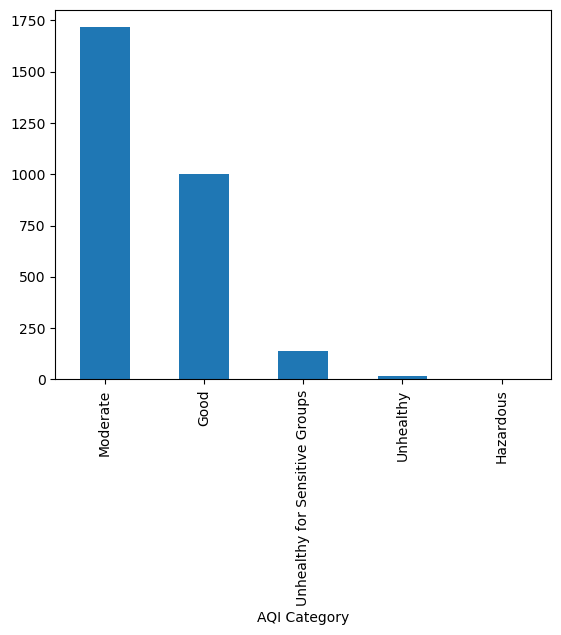

In [11]:
#Make it into a graph for visualization
us_df['AQI Category'].value_counts().plot.bar()

In [12]:
us_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,59.740599,1.456825,27.619777,8.541435,58.051532
std,22.822531,2.567693,13.160012,8.012248,23.966614
min,12.000000,0.000000,0.000000,0.000000,7.000000
25%,47.000000,1.000000,19.000000,3.000000,45.000000
50%,55.000000,1.000000,27.000000,6.000000,54.000000
75%,68.000000,2.000000,35.000000,12.000000,67.000000
max,500.000000,133.000000,125.000000,53.000000,500.000000


Get min AQI value city in US

In [13]:
us_df[us_df['AQI Value']==us_df['AQI Value'].min()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1148,United States of America,Provo,12,Good,0,Good,8,Good,12,Good,7,Good


Get max AQI value city in US

In [14]:
us_df[us_df['AQI Value']==us_df['AQI Value'].max()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
624,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous


Overall World AQI data Analysis

Data Preprocessing

In [16]:
pollution_df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [17]:
#display null values
null_data = pollution_df[pollution_df['Country'].isnull() | pollution_df['City'].isnull()]
null_data[['Country', 'City']].reset_index().style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,index,Country,City
0,535,nan,Granville
1,654,nan,Kingston Upon Hull
2,787,nan,New Waterford
3,801,nan,Kingstown
4,906,nan,Nanakuli
5,916,nan,Lavagna
6,968,nan,Ladispoli
7,985,nan,Dong Hoi
8,1139,nan,Nettuno
9,1169,nan,Puebloviejo


In [19]:
#remove null values
pollution_df = pollution_df.dropna()

#display null values
null_data = pollution_df[pollution_df['Country'].isnull() | pollution_df['City'].isnull()]
null_data[['Country', 'City']].reset_index().style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,index,Country,City


Data Analysis in World

In [20]:
#group each country by AQI value and find the average
pollution_df.groupby('Country')['AQI Value'].mean().reset_index().style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,Country,AQI Value
0,Afghanistan,95.959184
1,Albania,68.250000
2,Algeria,88.166667
3,Andorra,29.333333
4,Angola,83.925926
5,Argentina,28.235294
6,Armenia,53.636364
7,Aruba,163.000000
8,Australia,33.600000
9,Austria,53.720588


In [21]:
#find maximum average AQI value in the dataset and display 
aqi_value = pollution_df.groupby('Country')['AQI Value'].mean().max()
pollution_df[pollution_df['AQI Value'] == aqi_value]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1402,Republic of Korea,Seoul,421,Hazardous,27,Good,0,Good,91,Moderate,415,Hazardous


In [22]:
#check dataframe for AQI Data for Korea 
pollution_df[pollution_df['Country'] == 'Republic of Korea']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1402,Republic of Korea,Seoul,421,Hazardous,27,Good,0,Good,91,Moderate,415,Hazardous


Drop korea from the Dataset because it is having only single record. because of that it might give outliers

In [23]:
#drop Korea from dataset for no outlier in data
pollution_df = pollution_df.drop(pollution_df[pollution_df['Country'] == 'Republic of Korea'].index)
pollution_df[pollution_df['Country'] == 'Republic of Korea']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


In [24]:
#find maximum average AQI value in the dataset
aqi_value = pollution_df.groupby('Country')['AQI Value'].mean().max()
pollution_df[pollution_df['AQI Value'] == aqi_value]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2022,India,Atraulia,188,Unhealthy,4,Good,188,Unhealthy,1,Good,182,Unhealthy
2316,South Africa,Potchefstroom,188,Unhealthy,11,Good,15,Good,15,Good,188,Unhealthy
2924,India,Harda,188,Unhealthy,2,Good,32,Good,3,Good,188,Unhealthy
2968,Pakistan,Jampur,188,Unhealthy,2,Good,48,Good,4,Good,188,Unhealthy
3115,China,Xingtai,188,Unhealthy,5,Good,188,Unhealthy,5,Good,162,Unhealthy
3228,India,Nirsa,188,Unhealthy,1,Good,85,Moderate,1,Good,188,Unhealthy
3269,India,Utraula,188,Unhealthy,3,Good,165,Unhealthy,1,Good,188,Unhealthy
6353,Pakistan,Rohri,188,Unhealthy,1,Good,56,Moderate,1,Good,188,Unhealthy
6909,India,Ratanpur,188,Unhealthy,1,Good,64,Moderate,2,Good,188,Unhealthy
6952,India,Shahgarh,188,Unhealthy,1,Good,40,Good,0,Good,188,Unhealthy


In [25]:
#find cities with AQI values > 500(max value)
pollution_df[pollution_df['AQI Value'] == 500][['Country', 'City', 'AQI Value']].style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,Country,City,AQI Value
276,Pakistan,Bahawalnagar,500
470,India,Rania,500
524,India,Gohana,500
611,India,Gunnaur,500
620,Pakistan,Harunabad,500
644,India,Khetri,500
702,India,Jahangirpur,500
714,India,Kakrala,500
720,India,Kandhla,500
830,India,Mahendragarh,500


In [26]:
#display high aqi values in india
pollution_df[(pollution_df['Country'] == 'India') & (pollution_df['AQI Value'] == 500)].style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
470,India,Rania,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
524,India,Gohana,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous
611,India,Gunnaur,500,Hazardous,1,Good,73,Moderate,1,Good,500,Hazardous
644,India,Khetri,500,Hazardous,1,Good,40,Good,0,Good,376,Hazardous
702,India,Jahangirpur,500,Hazardous,1,Good,49,Good,1,Good,493,Hazardous
714,India,Kakrala,500,Hazardous,2,Good,95,Moderate,2,Good,478,Hazardous
720,India,Kandhla,500,Hazardous,3,Good,53,Moderate,8,Good,500,Hazardous
830,India,Mahendragarh,500,Hazardous,1,Good,42,Good,0,Good,435,Hazardous
1097,India,Gajraula,500,Hazardous,1,Good,55,Moderate,1,Good,500,Hazardous
1127,India,Nagaur,500,Hazardous,0,Good,35,Good,0,Good,426,Hazardous


In [27]:
#find minimum average AQI value in the dataset 
low_aqi_value = pollution_df.groupby('Country')['AQI Value'].mean().min()
pollution_df[pollution_df['AQI Value'] == low_aqi_value].style.set_table_attributes('style="max-height:300px; overflow-y:scroll; display:inline-block;"')

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
459,Brazil,Picos,16,Good,0,Good,12,Good,0,Good,16,Good
590,Brazil,Macapa,16,Good,1,Good,12,Good,0,Good,16,Good
696,Brazil,Itabera,16,Good,0,Good,16,Good,0,Good,16,Good
1567,Chile,Diego De Almagro,16,Good,0,Good,16,Good,2,Good,14,Good
1922,Brazil,Posse,16,Good,0,Good,9,Good,1,Good,16,Good
3049,Argentina,Chivilcoy,16,Good,0,Good,16,Good,1,Good,14,Good
3218,United Republic of Tanzania,Ndago,16,Good,0,Good,16,Good,0,Good,15,Good
4159,Brazil,Campo Formoso,16,Good,0,Good,13,Good,0,Good,16,Good
5255,Argentina,Neuquen,16,Good,0,Good,16,Good,1,Good,4,Good
5337,Brazil,Xanxere,16,Good,0,Good,16,Good,0,Good,14,Good


Minimum AQI Value in the Dataset

In [28]:
#find minimum AQI value in the dataset
aqi_value = pollution_df.groupby('City')['AQI Value'].mean().min()
pollution_df[pollution_df['AQI Value'] == aqi_value]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
512,Bolivia (Plurinational State of),El Torno,6,Good,0,Good,5,Good,0,Good,6,Good


Average Air Quality Index by country

In [29]:
#group data to get the mean AQI value per country
pollute_country = pollution_df.groupby("Country")["AQI Value"].mean().reset_index()

#generate the plotly choropleth map
fig = px.choropleth(pollute_country, locations="Country", locationmode="country names",
                    color="AQI Value", hover_name="Country",
                    color_continuous_scale="Turbo",
                    title="Average Air Quality Index by Country")
#display the map
fig.show()

Correlations between pollutants

In [30]:
#matrix of element values
corr_matrix = pollution_df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
corr_matrix

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.428063,0.405772,0.227938,0.984492
CO AQI Value,0.428063,1.000000,0.146209,0.482513,0.436164
Ozone AQI Value,0.405772,0.146209,1.000000,-0.183143,0.341133
NO2 AQI Value,0.227938,0.482513,-0.183143,1.000000,0.256306
PM2.5 AQI Value,0.984492,0.436164,0.341133,0.256306,1.000000


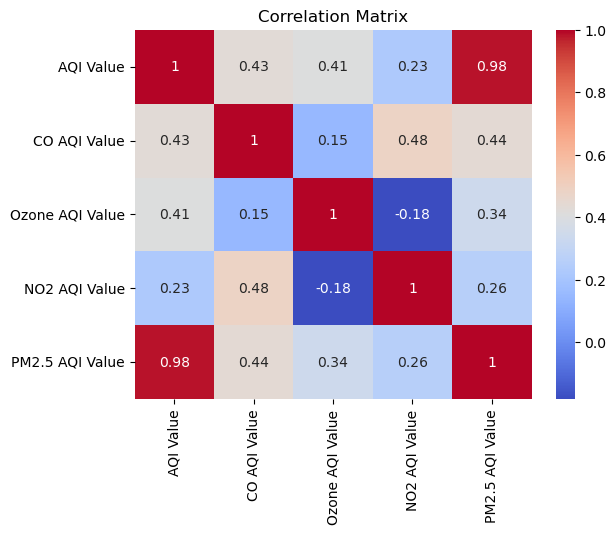

In [31]:
#display heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

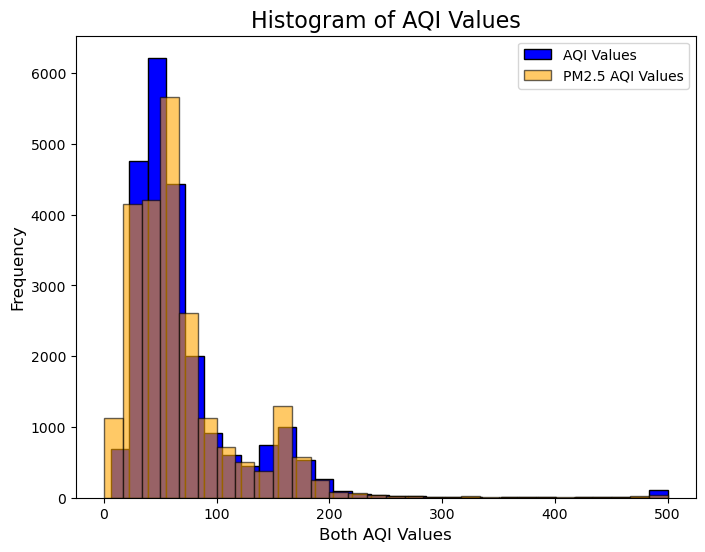

In [32]:
#create a figure and axis
plt.figure(figsize=(8, 6))

#plot histogram of AQI values
plt.hist(pollution_df['AQI Value'], bins=30, color='blue', edgecolor='black', label='AQI Values')
plt.hist(pollution_df['PM2.5 AQI Value'], bins=30, color='orange', edgecolor='black', alpha=0.6, label='PM2.5 AQI Values')

#add title and labels
plt.title('Histogram of AQI Values', fontsize=16)
plt.xlabel('Both AQI Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

#legend for both graphs
plt.legend(loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#display the plot
plt.show()


Model Development

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and non-relevant columns
df_clean = pollution_df.drop(columns=["Country", "City", "AQI Category", "CO AQI Category", 
                            "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"])


# Split features and target variable
X = df_clean.drop(columns=["AQI Value"])  # Features (pollutant AQI values)
y = df_clean["AQI Value"]  # Target (overall AQI Value)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the processed data shape
X_train_scaled.shape, X_test_scaled.shape


((18427, 4), (4607, 4))

Comparision between models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R² Score": r2}

# Display results
results


{'Linear Regression': {'MSE': 73.1268167710186,
  'R² Score': 0.9768598143402921},
 'Decision Tree': {'MSE': 7.970913826785327, 'R² Score': 0.997477691030817},
 'Random Forest': {'MSE': 7.467865313653136, 'R² Score': 0.9976368752604022},
 'Gradient Boosting': {'MSE': 10.095278527838316,
  'R² Score': 0.9968054589309947}}

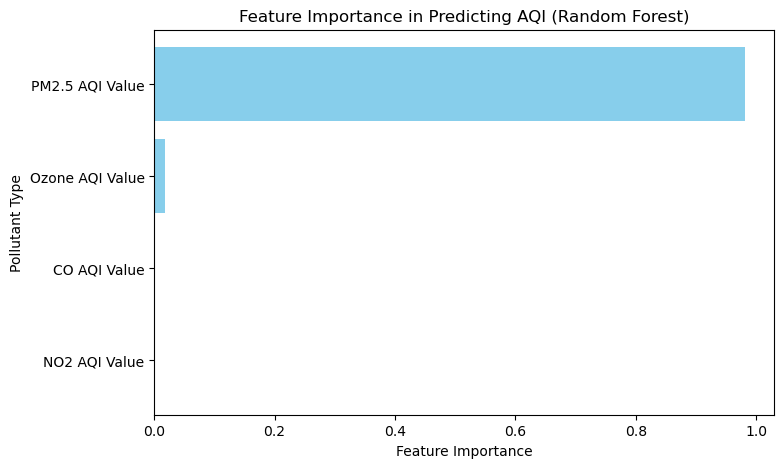

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained Random Forest model
rf_model = models["Random Forest"]
feature_importance = rf_model.feature_importances_

# Feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Pollutant Type")
plt.title("Feature Importance in Predicting AQI (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


Clustering Analysis

In [39]:
features = ['PM2.5 AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']
data = pollution_df[features].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

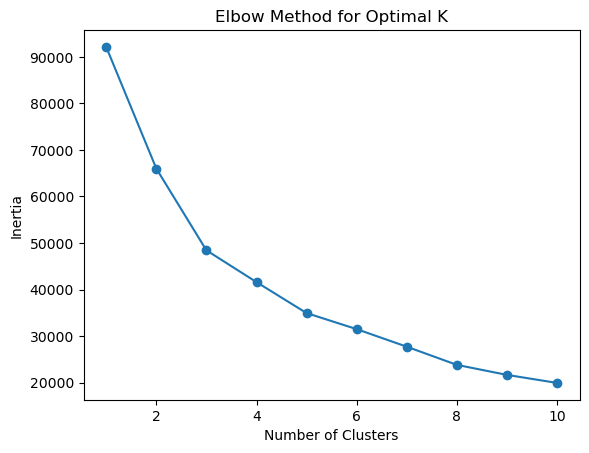

In [40]:
# Finding optimal clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()